In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/butterflies_moth'

test  train  valid


In [ ]:
# from kaggle: 12639 train, 500 test, 500 validation images 224 X 224 X 3 jpg format

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) # maybe use 150, 150, 3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
# use softmax because it gives probability distribution - 100 because there are 100 categories of butterflies/moths [treatng this like reuters newswire example from class]
model.add(layers.Dense(8, activation='softmax')) # TRY SOFTMAX bc single label multiclass classification (like reuters)

In [ ]:
# use model summary to see the model and understand the model
# model.summary() will display the architecture of the Convnet
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])
# from lecture with reuters example
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) #categorical crossentropy this time because we are looking at multiclass


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/butterflies_moth/train',
                                                    target_size=(224, 224),
                                                    batch_size=20,
                                                    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/butterflies_moth/valid',
                                                        target_size=(224, 224),
                                                        batch_size=5,
                                                        class_mode='categorical')

Found 999 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# look into repeat function to use higher number for validation_steps below (try to use 50) - it said it in an error message earlier...

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=5)

<ipython-input-10-b744c8568b8e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
10/10 [==============================] - 52s 4s/step - loss: 2.0677 - acc: 0.1850 - val_loss: 1.8305 - val_acc: 0.3200
Epoch 2/30
10/10 [==============================] - 30s 3s/step - loss: 1.7095 - acc: 0.4300 - val_loss: 1.5327 - val_acc: 0.4400
Epoch 3/30
10/10 [==============================] - 19s 2s/step - loss: 1.5088 - acc: 0.4573 - val_loss: 1.5074 - val_acc: 0.6400
Epoch 4/30
10/10 [==============================] - 21s 2s/step - loss: 1.1986 - acc: 0.6080 - val_loss: 1.0618 - val_acc: 0.6400
Epoch 5/30
10/10 [==============================] - 12s 1s/step - loss: 1.1140 - acc: 0.6250 - val_loss: 0.8514 - val_acc: 0.8000
Epoch 6/30
10/10 [==============================] - 11s 1s/step - loss: 0.9890 - acc: 0.6950 - val_loss: 0.8214 - val_acc: 0.8000
Epoch 7/30
10/10 [==============================] - 8s 805ms/step - loss: 0.8138 - acc: 0.7400 - val_loss: 0.8579 - val_acc: 0.7600
Epoch 8/30
10/10 [==============================] - 6s 619ms/step - loss: 0.7701 - acc: 

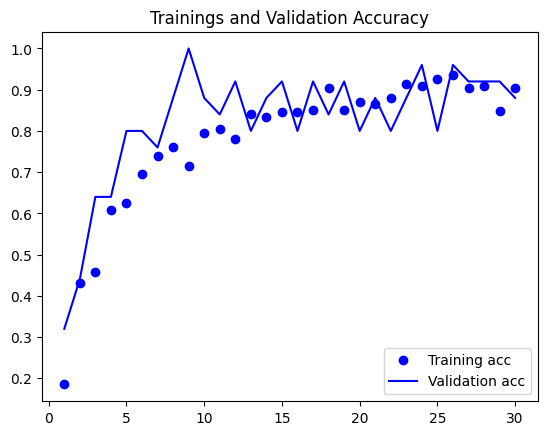

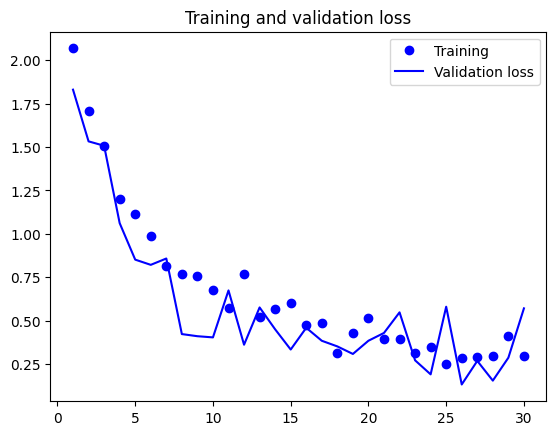

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trainings and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

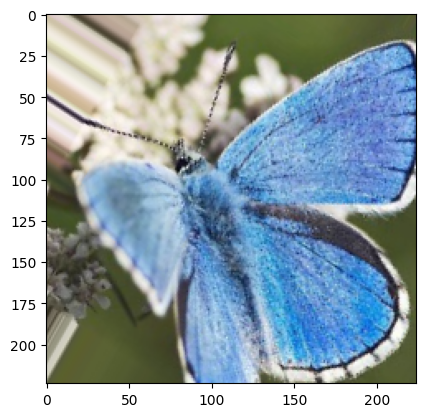

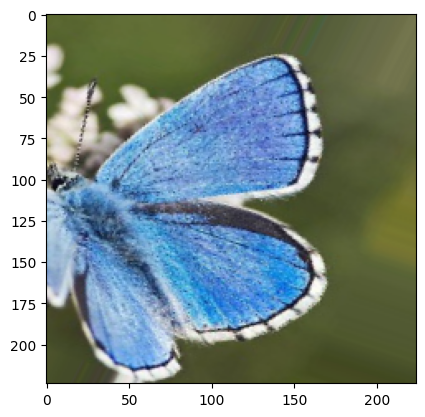

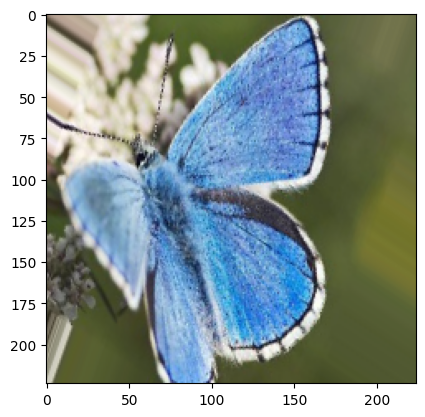

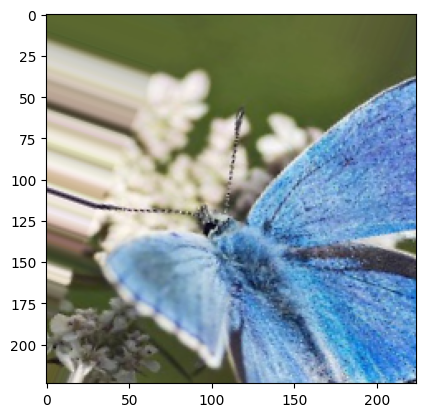

In [ ]:
import os
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img

train_adonis_dir = '/content/drive/MyDrive/butterflies_moth/train/ADONIS'

fnames = [os.path.join(train_adonis_dir, fname) for fname in os.listdir(train_adonis_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

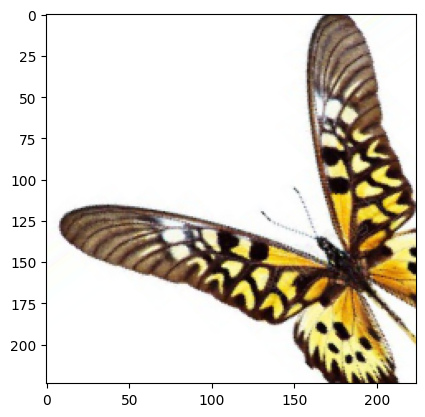

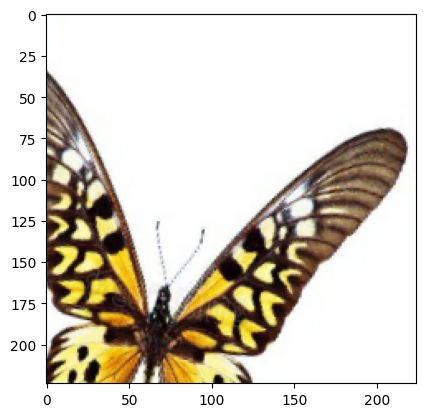

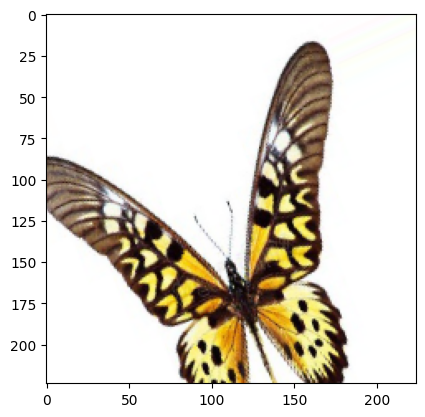

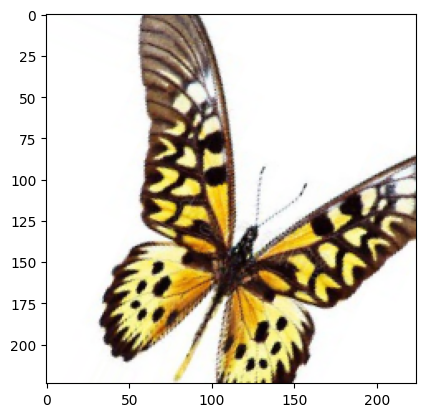

In [ ]:
train_afrgiaswa_dir = '/content/drive/MyDrive/butterflies_moth/train/AFRICAN GIANT SWALLOWTAIL'

fnames = [os.path.join(train_afrgiaswa_dir, fname) for fname in os.listdir(train_afrgiaswa_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

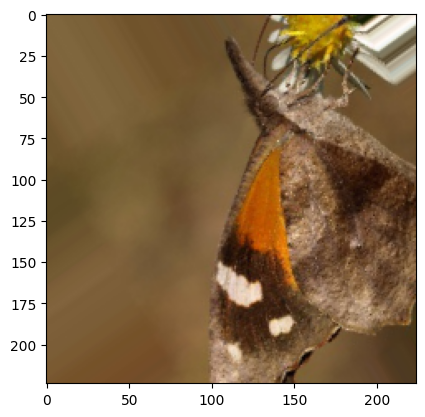

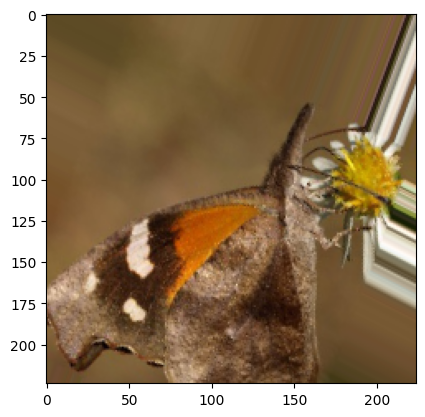

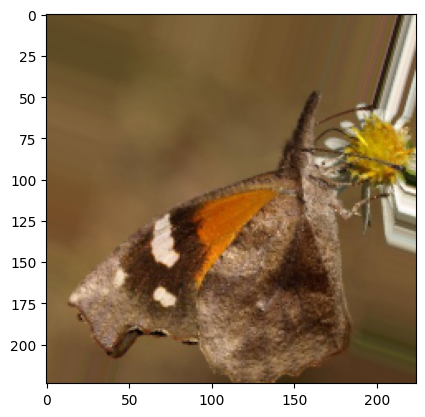

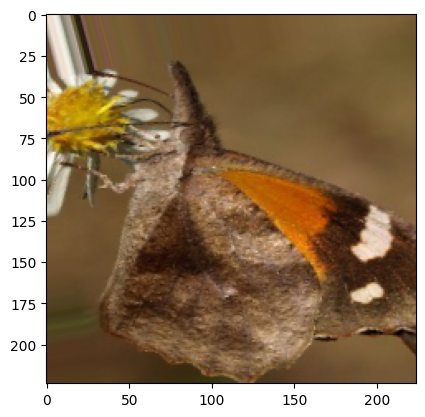

In [ ]:
train_amersnoot_dir = '/content/drive/MyDrive/butterflies_moth/train/AMERICAN SNOOT'

fnames = [os.path.join(train_amersnoot_dir, fname) for fname in os.listdir(train_amersnoot_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

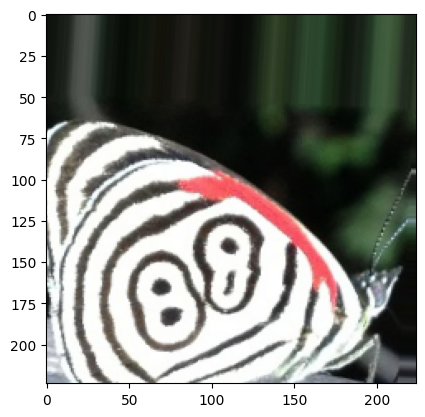

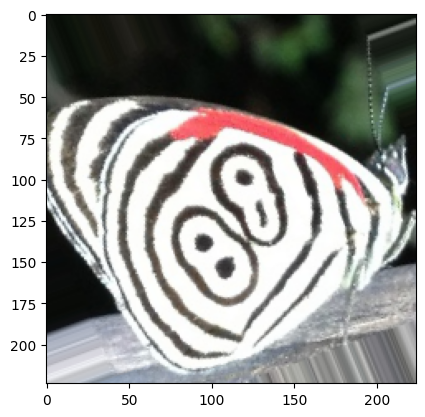

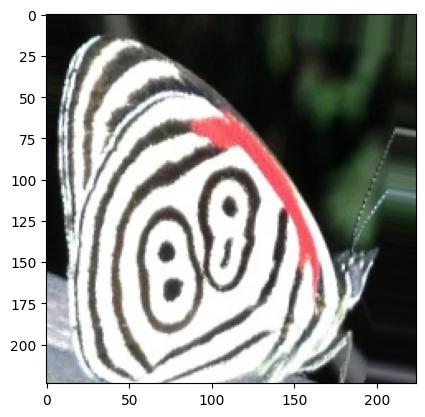

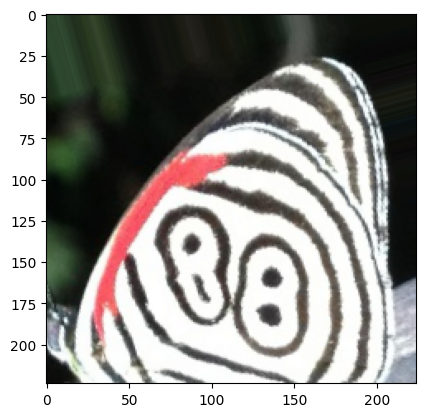

In [ ]:
# an 88

train_an88_dir = '/content/drive/MyDrive/butterflies_moth/train/AN 88'

fnames = [os.path.join(train_an88_dir, fname) for fname in os.listdir(train_an88_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()


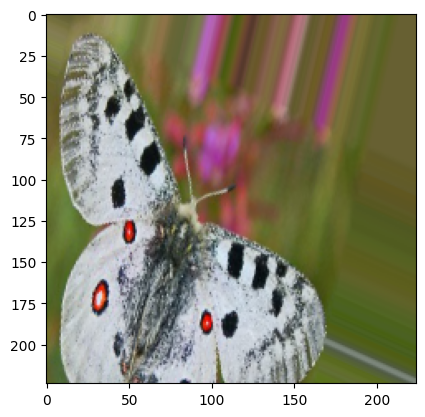

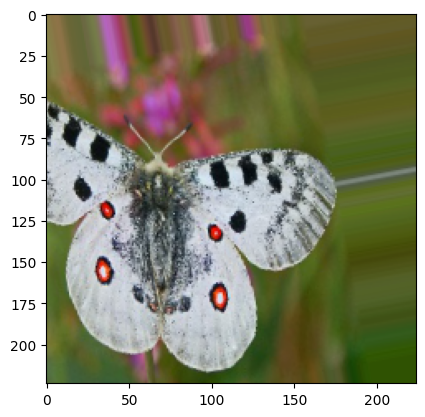

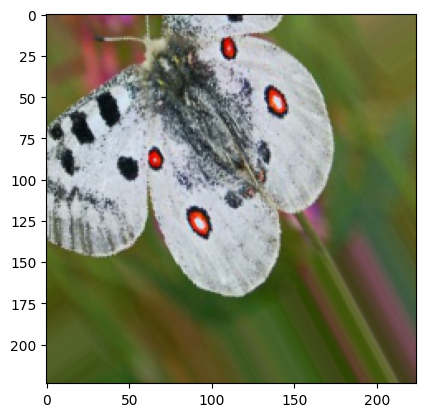

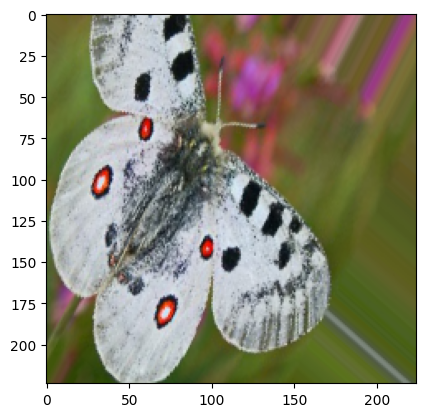

In [ ]:
# appollo

train_appollo_dir = '/content/drive/MyDrive/butterflies_moth/train/APPOLLO'

fnames = [os.path.join(train_appollo_dir, fname) for fname in os.listdir(train_appollo_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

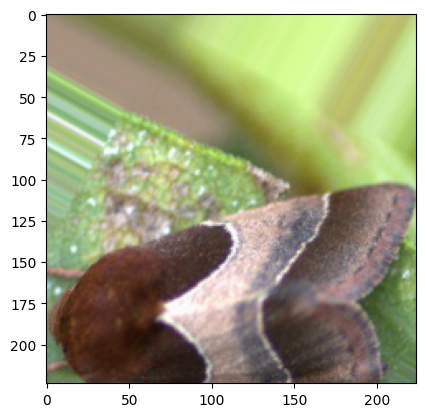

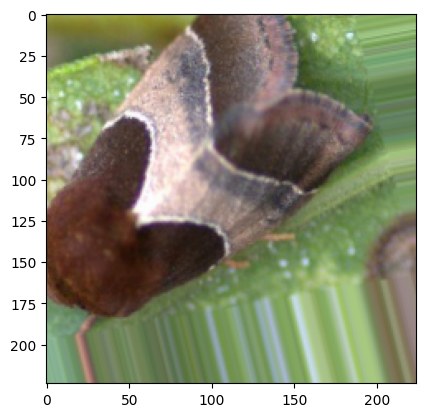

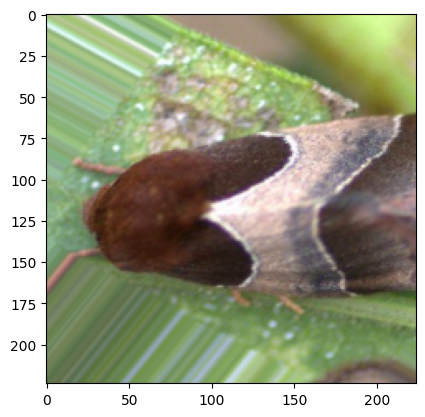

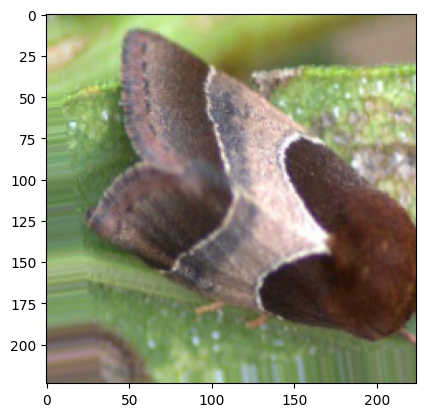

In [ ]:
# arcigera flower moth

train_arcflomoth_dir = '/content/drive/MyDrive/butterflies_moth/train/ARCIGERA FLOWER MOTH'

fnames = [os.path.join(train_arcflomoth_dir, fname) for fname in os.listdir(train_arcflomoth_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

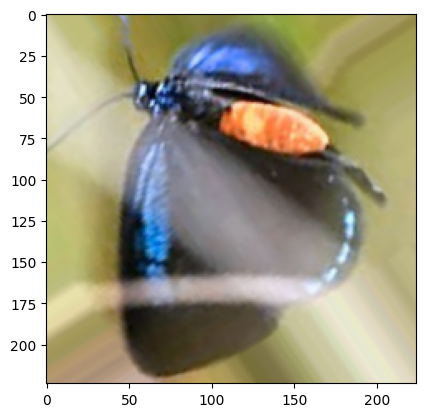

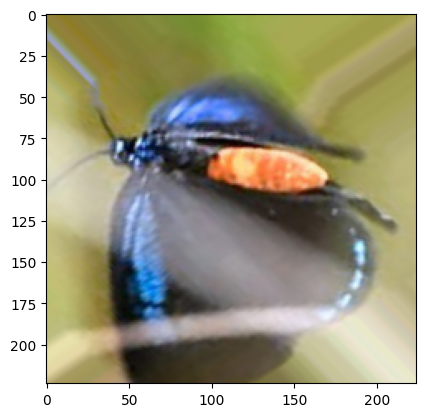

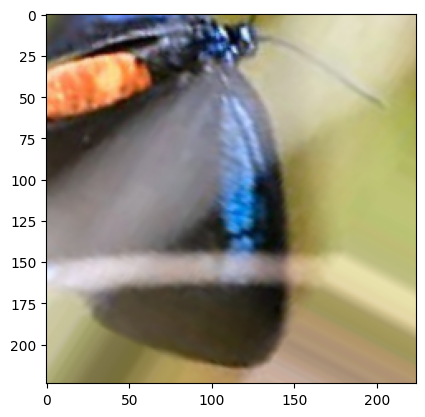

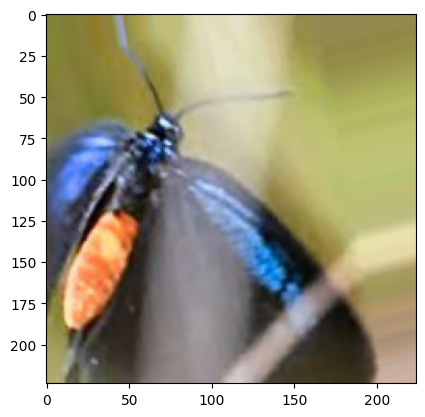

In [ ]:
# atala

train_atala_dir = '/content/drive/MyDrive/butterflies_moth/train/ATALA'

fnames = [os.path.join(train_atala_dir, fname) for fname in os.listdir(train_atala_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

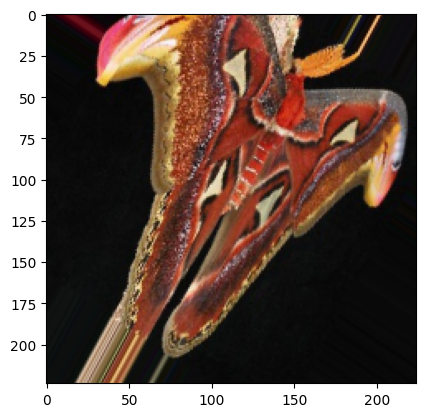

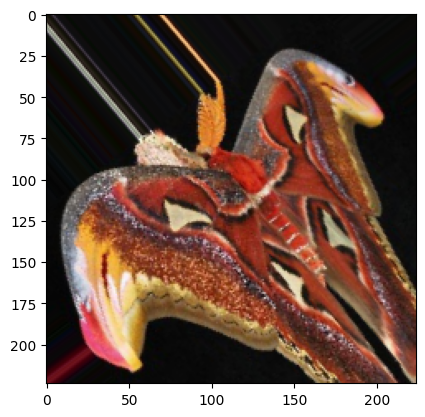

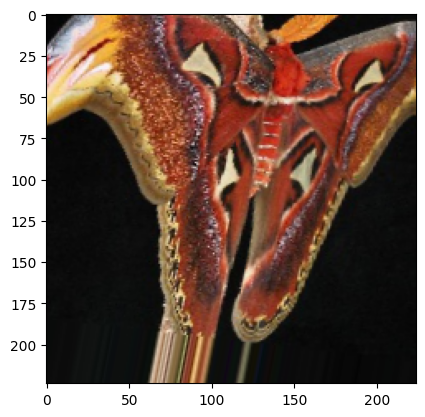

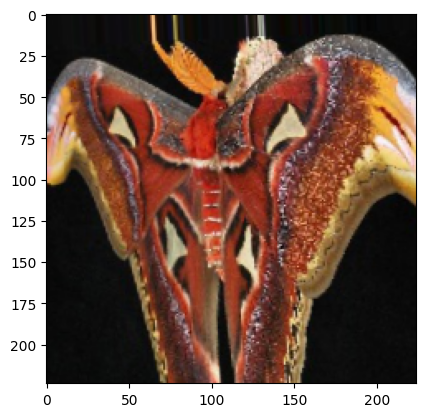

In [ ]:
# atlas moth

train_atlasmoth_dir = '/content/drive/MyDrive/butterflies_moth/train/ATLAS MOTH'

fnames = [os.path.join(train_atlasmoth_dir, fname) for fname in os.listdir(train_atlasmoth_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()


In [ ]:
# stopped running my code here so under this line code might be wrong (and it probably is...)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/butterflies_moth/train',
                                                    target_size=(224, 224),
                                                    batch_size=20,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/butterflies_moth/train',
                                                        target_size=(224, 224),
                                                        batch_size=5,
                                                        class_mode='categorical')

Found 999 images belonging to 8 classes.
Found 999 images belonging to 8 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=5)

<ipython-input-28-b66d22c87ec2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
10/10 [==============================] - 3s 331ms/step - loss: 0.4042 - acc: 0.8543 - val_loss: 0.3623 - val_acc: 0.8800
Epoch 2/100
10/10 [==============================] - 3s 302ms/step - loss: 0.4317 - acc: 0.8800 - val_loss: 0.6685 - val_acc: 0.8800
Epoch 3/100
10/10 [==============================] - 3s 316ms/step - loss: 0.4305 - acc: 0.8750 - val_loss: 0.4678 - val_acc: 0.8400
Epoch 4/100
10/10 [==============================] - 4s 425ms/step - loss: 0.5598 - acc: 0.7900 - val_loss: 0.1375 - val_acc: 0.9600
Epoch 5/100
10/10 [==============================] - 3s 294ms/step - loss: 0.4962 - acc: 0.8241 - val_loss: 0.2277 - val_acc: 0.9200
Epoch 6/100
10/10 [==============================] - 3s 296ms/step - loss: 0.3604 - acc: 0.8750 - val_loss: 0.4445 - val_acc: 0.9200
Epoch 7/100
10/10 [==============================] - 4s 434ms/step - loss: 0.4518 - acc: 0.8500 - val_loss: 0.1421 - val_acc: 1.0000
Epoch 8/100
10/10 [==============================] - 3s 296ms/step - 

In [ ]:
model.save('moth_and_butterflies.h5')

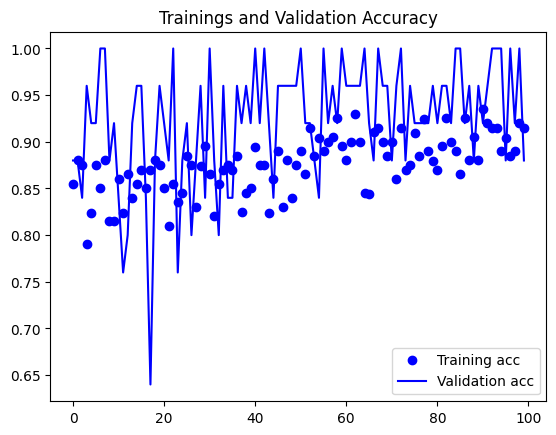

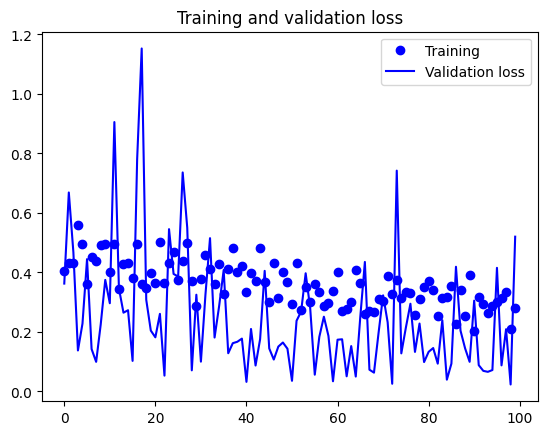

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trainings and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.utils import load_img
img = load_img('/content/drive/MyDrive/butterflies_moth/test/APPOLLO/2.jpg', target_size=(224, 224))

In [ ]:
from tensorflow.keras.utils import img_to_array
img_array = img_to_array(img)

In [ ]:
import numpy as np
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
prediction = model.predict(img_array)

1/1 [==============================] - 0s 19ms/step


In [ ]:
print(prediction.shape)

(1, 8)


In [ ]:
print(np.sum(prediction, axis=1))


[1.]


In [ ]:
if prediction.argmax() == 0:
    print("The image is ADONIS")
elif prediction.argmax() == 1:
    print("The image is AFRICAN GIANT SWALLOWTAIL")
elif prediction.argmax() == 2:
    print("The image is AMERICAN SNOOT")
elif prediction.argmax() == 3:
    print("The image is AN 88")
elif prediction.argmax() == 4:
    print("The image is APPOLLO")
elif prediction.argmax() == 5:
    print("The image is ARCIGERA FLOWER MOTH")
elif prediction.argmax() == 6:
    print("The image is ATALA")
else:
    print("The image is ATLAS MOTH")


The image is APPOLLO


In [ ]:
from tensorflow.keras.utils import load_img
img = load_img('/content/drive/MyDrive/butterflies_moth/test/AN 88/3.jpg', target_size=(224, 224))

In [ ]:
from tensorflow.keras.utils import img_to_array
img_array = img_to_array(img)

In [ ]:
import numpy as np
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
prediction = model.predict(img_array)

1/1 [==============================] - 0s 28ms/step


In [ ]:
if prediction.argmax() == 0:
    print("The image is ADONIS")
elif prediction.argmax() == 1:
    print("The image is AFRICAN GIANT SWALLOWTAIL")
elif prediction.argmax() == 2:
    print("The image is AMERICAN SNOOT")
elif prediction.argmax() == 3:
    print("The image is AN 88")
elif prediction.argmax() == 4:
    print("The image is APPOLLO")
elif prediction.argmax() == 5:
    print("The image is ARCIGERA FLOWER MOTH")
elif prediction.argmax() == 6:
    print("The image is ATALA")
else:
    print("The image is ATLAS MOTH")


The image is AN 88


In [ ]:
from tensorflow.keras.utils import load_img
img = load_img('/content/drive/MyDrive/butterflies_moth/test/AMERICAN SNOOT/2.jpg', target_size=(224, 224))

In [ ]:
from tensorflow.keras.utils import img_to_array
img_array = img_to_array(img)

In [ ]:
import numpy as np
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
prediction = model.predict(img_array)

1/1 [==============================] - 0s 20ms/step


In [ ]:
if prediction.argmax() == 0:
    print("The image is ADONIS")
elif prediction.argmax() == 1:
    print("The image is AFRICAN GIANT SWALLOWTAIL")
elif prediction.argmax() == 2:
    print("The image is AMERICAN SNOOT")
elif prediction.argmax() == 3:
    print("The image is AN 88")
elif prediction.argmax() == 4:
    print("The image is APPOLLO")
elif prediction.argmax() == 5:
    print("The image is ARCIGERA FLOWER MOTH")
elif prediction.argmax() == 6:
    print("The image is ATALA")
else:
    print("The image is ATLAS MOTH")

The image is AMERICAN SNOOT
